In [45]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import time
import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl


%matplotlib inline
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [46]:
## tp1 23.05 -> two big clusters
## tp1 25.05 -> no cooking problem
## TODO : tp2 2010_07_31.dat hcluster grouping (small cookings group together) describe in bachelor

dframe = pd.read_csv('tp2_sensordata_31_07.csv', sep=',', parse_dates=[1], header=None,
                         names=['datetime', 'sec', 'ms', 'event_type', 'event_subtype', 'sensor_id','z','x','y','value', 'something'])

dframe['datetime'] = pd.to_datetime(dframe['datetime'])
# calculate diff in seconds from day begin
dframe['seconddelta'] = dframe.datetime.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )
dframe['msseconddelta'] = dframe.seconddelta + dframe.ms/1000
dframes4 = DataFrame(dframe.loc[dframe['sensor_id'] == 4])
dframes4['valuediff'] = dframes4.value.diff()

## check for corruption
if(dframes4.value.max() > 100):
    print "sensor corrupt."
    print "max temp value:", dframes4.value.max()
    print "min temp value:", dframes4.value.min()

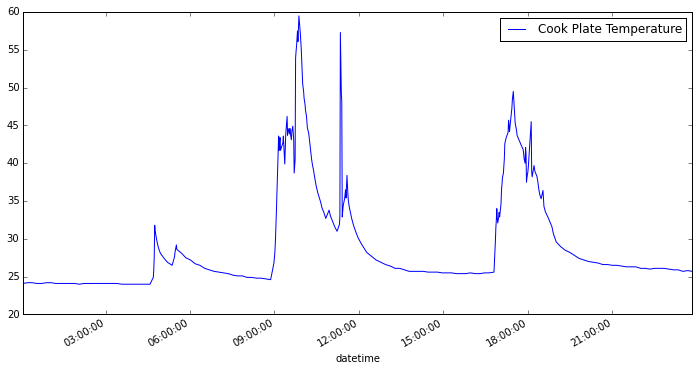

In [47]:
dframes4.plot(x='datetime', y='value', label="Cook Plate Temperature")

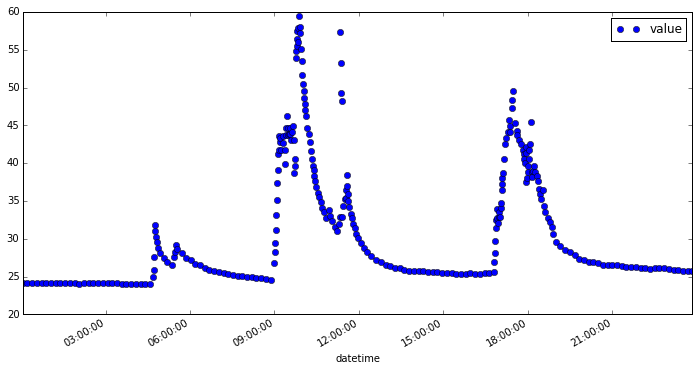

In [48]:
dframes4.plot(x='datetime', y='value', style='o')

In [49]:
#dframes4[(dframes4.datetime > '2010-05-23 09:00:00') & (dframes4.datetime < '2010-05-23 12:00:00')].plot(x='datetime', y='value', style='o')

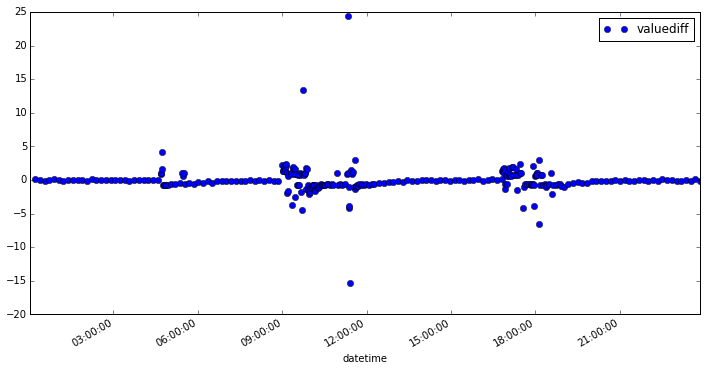

In [50]:
dframes4.plot(x='datetime', y='valuediff', style='o')

In [51]:
dframes4['valuediff'].describe()

count    281.000000
mean       0.005694
std        2.242775
min      -15.300000
25%       -0.700000
50%       -0.100000
75%        0.700000
max       24.400000
Name: valuediff, dtype: float64

In [52]:
## first posibility to filter out the noise in data ##
filter_treshold1 = abs(np.round(dframes4['valuediff'].quantile(.25), decimals=2)) * 2
filter_treshold1

1.3999999999999999

In [53]:
dframes4['valuediff'].values

array([  nan,   0.1,   0. ,  -0.1,   0. ,   0.1,   0. ,  -0.1,   0. ,
         0. ,   0. ,   0. ,  -0.1,   0.1,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,  -0.1,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0.9,   1. ,   1.7,   4.2,  -0.8,  -0.7,  -0.7,  -0.8,
        -0.7,  -0.6,  -0.6,  -0.4,   1.1,   0.6,   1. ,  -0.6,  -0.5,
        -0.6,  -0.3,  -0.5,  -0.2,  -0.4,  -0.2,  -0.2,  -0.1,  -0.1,
        -0.1,  -0.2,  -0.1,   0. ,  -0.2,   0. ,  -0.1,   0. ,  -0.1,
        -0.1,   2.2,   1.4,   1.3,   1.7,   1.9,   2. ,   2.3,   1.7,
         2.1,   2.4,  -1.9,   1.1,   0.6,  -1.7,   1. ,   0.9,  -3.7,
         1.8,   2. ,   0.9,   1.6,  -2.5,   0.9,  -0.7,   0.7,  -0.7,
        -0.8,   1.1,   0.7,  -1.8,  -4.4,   0.9,   0.9,  13.4,   0.9,
         0.7,   1. ,   1. ,  -1.4,   1.8,   1.6,  -1.5,  -0.8,  -2.1,
        -1.6,  -1.8,  -1.2,  -1. ,  -0.9,  -0.8,  -0.8,  -0.7,  -1.6,
        -0.8,  -1.1,  -1.2,  -1.1,  -0.8,  -0.6,  -0.8,  -0.7,  -0.7,
        -0.8,  -0.6,

In [54]:
## second posibility to filter out the noise in data ##

from collections import defaultdict
ser = dframes4['valuediff'].value_counts()
    #print a, dframe2005s4['valuediff'].value_counts()[a]

# iterate over all values and create abs dict D
D = defaultdict(int)
for key in ser.index.values:
    rkey = round(key,1)
    print abs(rkey), ser[key]
    D[abs(rkey)] += ser[key]

print "iteration done.\n"

# global counter
gc = 0
for k in D:
    print k, D[k]
    gc += D[k]
    
print 'global counter: ', gc

values_to_filterout = []
for k in D:
    print k, D[k], ',%:',(100*D[k])/gc
    # if bigger than 20% add to valies to filterout
    if (100*D[k])/gc > 20:
        values_to_filterout.append(k)

print '---'
# check values to filter out
for v in values_to_filterout:
    print v

filter_treshold2 = 0
if len(values_to_filterout) > 0:
    filter_treshold2 = max(values_to_filterout)*2
    
print ' filter_treshold2: ', filter_treshold2

0.0 43
0.6 21
0.1 15
0.9 10
0.8 10
0.1 9
0.2 9
1.0 8
0.7 8
0.1 6
0.8 6
0.7 6
1.1 6
0.8 5
0.6 5
0.5 5
0.7 4
0.6 4
0.7 4
1.1 4
0.2 4
0.3 3
0.6 3
1.2 3
2.0 3
0.4 3
1.0 3
1.6 3
2.1 2
3.0 2
1.8 2
1.1 2
2.4 2
2.1 2
0.9 2
0.8 2
0.3 2
1.4 2
1.5 2
1.7 2
1.5 2
1.8 2
0.1 2
0.7 2
1.6 1
6.6 1
1.2 1
1.9 1
1.9 1
0.9 1
15.3 1
3.9 1
1.1 1
1.4 1
3.8 1
2.5 1
24.4 1
2.3 1
1.3 1
1.6 1
1.2 1
4.2 1
1.1 1
0.6 1
3.7 1
1.7 1
2.2 1
1.9 1
1.7 1
1.3 1
4.1 1
4.2 1
1.8 1
13.4 1
1.3 1
1.8 1
1.6 1
0.9 1
4.4 1
0.4 1
iteration done.

0.0 43
1.0 11
2.0 3
3.0 2
0.6 34
1.5 4
0.1 32
3.9 1
24.4 1
0.7 24
1.4 3
4.1 1
0.5 5
6.6 1
2.4 2
3.7 1
2.3 1
1.8 6
4.4 1
0.9 14
4.2 2
0.4 4
0.3 5
1.2 5
1.1 14
1.9 3
1.6 6
2.5 1
1.3 3
13.4 1
0.2 13
0.8 23
15.3 1
2.1 4
1.7 4
3.8 1
2.2 1
global counter:  281
0.0 43 ,%: 15
1.0 11 ,%: 3
2.0 3 ,%: 1
3.0 2 ,%: 0
0.6 34 ,%: 12
1.5 4 ,%: 1
0.1 32 ,%: 11
3.9 1 ,%: 0
24.4 1 ,%: 0
0.7 24 ,%: 8
1.4 3 ,%: 1
4.1 1 ,%: 0
0.5 5 ,%: 1
6.6 1 ,%: 0
2.4 2 ,%: 0
3.7 1 ,%: 0
2.3 1 ,%: 0
1.8 6 ,%: 2
4.4 1 ,%: 0
0.9

In [55]:
# take filter treshold
ft = max([filter_treshold1, filter_treshold2])
if ft > 0.2:
    ft = 0.2
def valuation_formula(diff):
    if abs(diff) <= ft:
        return 0
    else:
        return diff
    
dframes4['valuediffauto'] = dframes4.apply(lambda row: valuation_formula(row['valuediff']), axis=1)

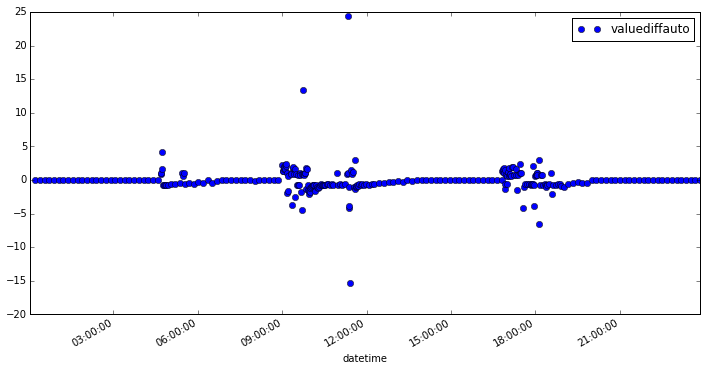

In [56]:
dframes4.plot(x='datetime', y='valuediffauto', style='o')

In [57]:
dframes4['valuediffauto'].value_counts()

 0.0     84
-0.6     21
 0.9     10
-0.8     10
 1.0      8
-0.7      8
 1.1      6
 0.7      6
-0.8      6
-0.5      5
 0.6      5
 0.8      5
-0.2      4
-0.7      4
-1.1      4
-0.7      4
-0.6      4
-1.0      3
 1.6      3
 1.2      3
-0.6      3
 2.0      3
-0.4      3
-0.3      3
-0.3      2
-0.8      2
 1.1      2
 1.8      2
-0.9      2
 3.0      2
         ..
-0.9      1
-1.2      1
-1.6      1
 1.9      1
 1.4      1
-1.1      1
 2.3      1
-3.9      1
 1.8      1
 1.3      1
-4.2      1
 2.2      1
 1.6      1
-0.4      1
-0.9      1
-1.9      1
-1.6      1
-15.3     1
-6.6      1
 0.6      1
 1.9      1
-1.7      1
-1.3      1
 4.2      1
 24.4     1
 1.7      1
 1.3      1
-4.4      1
 13.4     1
 1.8      1
dtype: int64

In [58]:
dframes4['valuebit'] = dframes4.valuediffauto.map( lambda x: x > 0 )

In [59]:
prev_row = {}
prev_row['value'] = 'null'
prev_row['valuediffauto'] = 0.0
index = -1
output = index
def block_cooking(row):
    global prev_row, index, output
    #if prev_row is None: prev_row['value'] = 'none'
    
    # if prev <=0.0 && this > 0.0
    # index = 0
    # return index 
    # index++
    if prev_row['valuediffauto'] <= 0.0 and row['valuediffauto'] > 0.0:
        index = 0
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        index += 1
    # else if prev >= 0.0 && this > 0.0
    # return index
    # index++
    elif prev_row['valuediffauto'] >= 0.0 and row['valuediffauto'] > 0.0:
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        index += 1
    # else if this < 0.0
    # index = 0
    elif row['valuediffauto'] < 0.0:
        index = -1
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
    # DEBUG
    elif prev_row['valuediffauto'] >= 0.0 and row['valuediffauto'] == 0.0:
        index = -1
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
    else:
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        output = index
    
    prev_row = row
    return output
    #if row['valuediffauto'] <= 0.0:
    #    print 'valuediffnegativ'
    
dframes4['blockevent_counter'] = dframes4.apply(lambda row: block_cooking(row), axis=1)

2010-07-31 00:03:38 nan 24.1 , prev:  null , index:  -1
2010-07-31 00:13:42 0.0 24.2 , prev:  24.1 , index:  -1
2010-07-31 00:23:44 0.0 24.2 , prev:  24.2 , index:  -1
2010-07-31 00:33:47 0.0 24.1 , prev:  24.2 , index:  -1
2010-07-31 00:43:49 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 00:53:51 0.0 24.2 , prev:  24.1 , index:  -1
2010-07-31 01:03:54 0.0 24.2 , prev:  24.2 , index:  -1
2010-07-31 01:13:56 0.0 24.1 , prev:  24.2 , index:  -1
2010-07-31 01:24:00 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 01:34:02 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 01:44:05 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 01:54:07 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 02:04:09 0.0 24.0 , prev:  24.1 , index:  -1
2010-07-31 02:14:12 0.0 24.1 , prev:  24.0 , index:  -1
2010-07-31 02:24:15 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 02:34:18 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 02:44:20 0.0 24.1 , prev:  24.1 , index:  -1
2010-07-31 02:54:23 0.0 24.1 , prev:  24.1 , ind

In [60]:
# filter out single temperature increases
row_array_index_counter = 0
for row_index in dframes4.index.values:
    # check end index
    if row_array_index_counter + 1 < len(dframes4.index.values):
        thisrow = dframes4.ix[row_index]['blockevent_counter']
        nextrow = dframes4.ix[dframes4.index.values[row_array_index_counter+1]]['blockevent_counter']
        print "this:", thisrow, ", next: ",nextrow
        if thisrow == 0 and nextrow == -1:
            # set to -1
            dframes4.ix[row_index,'blockevent_counter'] = -1
    
    # increase
    row_array_index_counter += 1
    

this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  0
this: 0 , next:  1
this: 1 , next:  2
this: 2 , next:  3
this: 3 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  0
this: 0 , next:  1
this: 1 , next:  2
this: 2 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: -1 , next:  -1
this: 

In [61]:
from itertools import cycle
li = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'R', 'S', 'T']
running = True
licycle = cycle(li)
# Prime the pump
#nextelem = licycle.next()
prev_row = {}
prev_row['value'] = 'null'
prev_row['blockevent_counter'] = -1
block = 0
output = index
def block_cooking(row):
    global prev_row, block, output, nextelem

    if row['blockevent_counter'] == -1:
        nextelem = np.nan
    elif row['blockevent_counter'] == 0  and prev_row['blockevent_counter'] == -1: 
        nextelem = licycle.next()
        
    print row['datetime'],',', row['valuediffauto'],',', row['value'], ', blockcounter: ', row['blockevent_counter'], ',',nextelem
    prev_row = row
    return nextelem
    
dframes4['cooking_event'] = dframes4.apply(lambda row: block_cooking(row), axis=1)

2010-07-31 00:03:38 , nan , 24.1 , blockcounter:  -1 , nan
2010-07-31 00:13:42 , 0.0 , 24.2 , blockcounter:  -1 , nan
2010-07-31 00:23:44 , 0.0 , 24.2 , blockcounter:  -1 , nan
2010-07-31 00:33:47 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 00:43:49 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 00:53:51 , 0.0 , 24.2 , blockcounter:  -1 , nan
2010-07-31 01:03:54 , 0.0 , 24.2 , blockcounter:  -1 , nan
2010-07-31 01:13:56 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 01:24:00 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 01:34:02 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 01:44:05 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 01:54:07 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 02:04:09 , 0.0 , 24.0 , blockcounter:  -1 , nan
2010-07-31 02:14:12 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 02:24:15 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 02:34:18 , 0.0 , 24.1 , blockcounter:  -1 , nan
2010-07-31 02:44:20 , 0.0 , 24.1 , blockcounter:  -1 , n

In [62]:
dframes4['timediff'] = dframes4.datetime.diff()
dframes4['msseconddeltadiff'] = dframes4.msseconddelta.diff()
# time to next event 
dframes4['msseconddeltadiff'] = dframes4.msseconddeltadiff.shift(-1)

In [63]:
dframes4.head(5)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,valuediff,valuediffauto,valuebit,blockevent_counter,cooking_event,timediff,msseconddeltadiff
127,2010-07-31 00:03:38,1280534618,758,R,0,4,3700569,143,1,24.1,2130706433,218,218.758,NaN,NaN,False,-1,NaN,NaT,603.438
230,2010-07-31 00:13:42,1280535222,196,R,0,4,3700778,143,1,24.2,2130706433,822,822.196,0.1,0,False,-1,NaN,00:10:04,602.426
245,2010-07-31 00:23:44,1280535824,622,R,0,4,3700914,143,1,24.2,2130706433,1424,1424.622,0.0,0,False,-1,NaN,00:10:02,602.424
261,2010-07-31 00:33:47,1280536427,46,R,0,4,3701051,143,1,24.1,2130706433,2027,2027.046,-0.1,0,False,-1,NaN,00:10:03,602.428
279,2010-07-31 00:43:49,1280537029,474,R,0,4,3701188,143,1,24.1,2130706433,2629,2629.474,0.0,0,False,-1,NaN,00:10:02,602.426


In [64]:
grp = dframes4.groupby('cooking_event').sum()

In [65]:
dframes4.value.describe()

count    282.000000
mean      33.988652
std        9.001566
min       24.000000
25%       26.025000
50%       32.050000
75%       40.600000
max       59.500000
Name: value, dtype: float64

In [68]:
grpindex = grp.index
grpindexvals = grp.index.values
for g, ce in zip(grpindex, grpindexvals):
    print 'cooking group:', g, 'seconds:', grp['msseconddeltadiff'][ce], 'minutes: ', grp['msseconddeltadiff'][ce]/60, "s:", dframes4[dframes4.cooking_event==g].datetime.min().time(), "e:", dframes4[dframes4.cooking_event==g].datetime.max().time(), ",maxtemp:", dframes4[dframes4.cooking_event==g].value.max()
    if dframes4[dframes4.cooking_event==g].value.max() < 30:
        dframes4 = dframes4[dframes4.cooking_event != g]

cooking group: A seconds: 240.988 minutes:  4.01646666667 s: 04:41:51 e: 04:44:51 ,maxtemp: 31.8
cooking group: B seconds: 301.227 minutes:  5.02045 s: 05:27:02 e: 05:31:03 ,maxtemp: 29.2
cooking group: C seconds: 662.706 minutes:  11.0451 s: 08:58:57 e: 09:08:59 ,maxtemp: 43.6
cooking group: D seconds: 120.494 minutes:  2.00823333333 s: 09:11:00 e: 09:12:00 ,maxtemp: 43.4
cooking group: E seconds: 240.974 minutes:  4.01623333333 s: 09:18:02 e: 09:19:02 ,maxtemp: 43.6
cooking group: F seconds: 301.231 minutes:  5.02051666667 s: 09:23:03 e: 09:27:04 ,maxtemp: 46.2
cooking group: G seconds: 240.977 minutes:  4.01628333333 s: 09:37:06 e: 09:39:07 ,maxtemp: 44.9
cooking group: H seconds: 422.727 minutes:  7.04545 s: 09:43:08 e: 09:49:10 ,maxtemp: 57.5
cooking group: I seconds: 180.737 minutes:  3.01228333333 s: 09:51:11 e: 09:52:11 ,maxtemp: 59.5
cooking group: J seconds: 180.74 minutes:  3.01233333333 s: 11:18:33 e: 11:20:33 ,maxtemp: 57.3
cooking group: K seconds: 361.465 minutes:  6.024

In [69]:
grp = dframes4.groupby('cooking_event').sum()
for g, ce in zip(grp.index, grp.index.values):
    print 'cooking group:', g, 'seconds:', grp['msseconddeltadiff'][ce], 'minutes: ', grp['msseconddeltadiff'][ce]/60, "s:", dframes4[dframes4.cooking_event==g].datetime.min().time(), "e:", dframes4[dframes4.cooking_event==g].datetime.max().time(), ",maxtemp:", dframes4[dframes4.cooking_event==g].value.max()

cooking group: A seconds: 240.988 minutes:  4.01646666667 s: 04:41:51 e: 04:44:51 ,maxtemp: 31.8
cooking group: C seconds: 662.706 minutes:  11.0451 s: 08:58:57 e: 09:08:59 ,maxtemp: 43.6
cooking group: D seconds: 120.494 minutes:  2.00823333333 s: 09:11:00 e: 09:12:00 ,maxtemp: 43.4
cooking group: E seconds: 240.974 minutes:  4.01623333333 s: 09:18:02 e: 09:19:02 ,maxtemp: 43.6
cooking group: F seconds: 301.231 minutes:  5.02051666667 s: 09:23:03 e: 09:27:04 ,maxtemp: 46.2
cooking group: G seconds: 240.977 minutes:  4.01628333333 s: 09:37:06 e: 09:39:07 ,maxtemp: 44.9
cooking group: H seconds: 422.727 minutes:  7.04545 s: 09:43:08 e: 09:49:10 ,maxtemp: 57.5
cooking group: I seconds: 180.737 minutes:  3.01228333333 s: 09:51:11 e: 09:52:11 ,maxtemp: 59.5
cooking group: J seconds: 180.74 minutes:  3.01233333333 s: 11:18:33 e: 11:20:33 ,maxtemp: 57.3
cooking group: K seconds: 361.465 minutes:  6.02441666667 s: 11:26:35 e: 11:31:36 ,maxtemp: 36.5
cooking group: L seconds: 361.479 minutes: 

In [21]:
# cooking longer than 10min (number of clusters)
print grp[grp.msseconddeltadiff > 20].index.values

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'O' 'P' 'R' 'S']


In [22]:
#### clusterAnzahl schätzen ####

## number of clusters1 ## (method1)
'''
cookevents = grp[grp.msseconddeltadiff > 600].index.values
cluster_number1 = len(cookevents)
cluster_number1
'''
#### (method2)
cookevents = grp.index.values
cluster_number1 = len(cookevents)
cluster_number1

17

In [23]:
mergeddf = pd.DataFrame()
for cg in cookevents:
    mergeddf = pd.concat([mergeddf,pd.DataFrame(dframes4[dframes4['cooking_event']==cg])], axis=0)

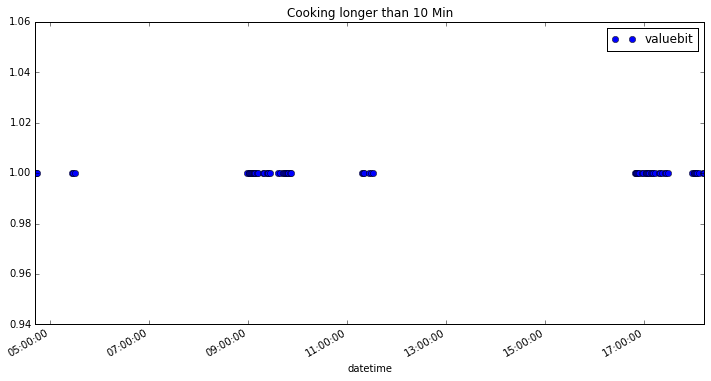

In [24]:
mergeddf.plot(x='datetime', y='valuebit', style='o', title='Cooking longer than 10 Min')

In [25]:
CT = mergeddf[['msseconddelta', 'valuebit']].values

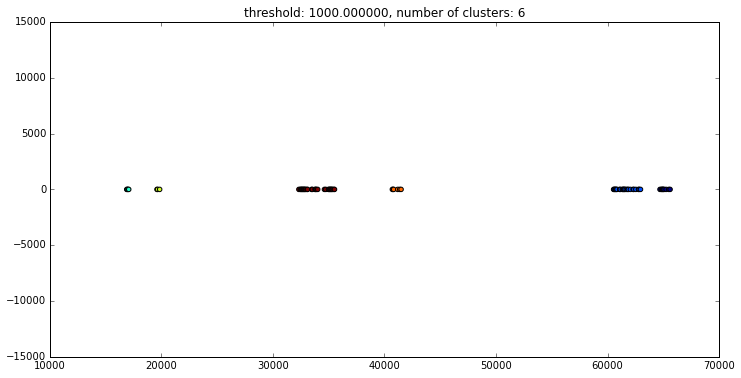

In [26]:
import scipy.cluster.hierarchy as hcluster
data = CT
# clustering
thresh = 1000
clusters = hcluster.fclusterdata(data, thresh, criterion="distance")

# plotting
plt.scatter(*np.transpose(data), c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

hcluster: 1.0 seconds: 843.427 minutes:  14.0571166667 s: 17:58:16 e: 18:13:19
hcluster: 2.0 seconds: 2290.307 minutes:  38.1717833333 s: 16:48:58 e: 17:29:09
hcluster: 3.0 seconds: 240.988 minutes:  4.01646666667 s: 04:41:51 e: 04:44:51
hcluster: 4.0 seconds: 301.227 minutes:  5.02045 s: 05:27:02 e: 05:31:03
hcluster: 5.0 seconds: 542.205 minutes:  9.03675 s: 11:18:33 e: 11:31:36
hcluster: 6.0 seconds: 2169.846 minutes:  36.1641 s: 08:58:57 e: 09:52:11
cookevents2 [ 1.  2.  6.]
##########
cluster: 1.0 Start:  17:58:16 mean: 18:05:48 End:  18:13:19
cluster: 2.0 Start:  16:48:58 mean: 17:09:03 End:  17:29:09
cluster: 6.0 Start:  08:58:57 mean: 09:25:34 End:  09:52:11
##########
3


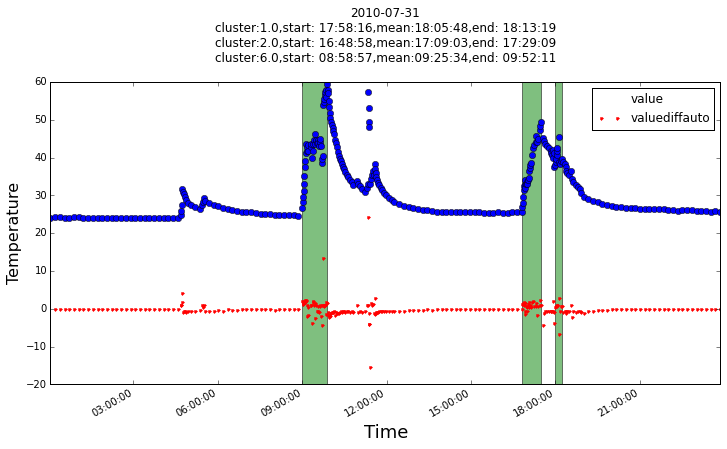

TypeError: pivot() keywords must be strings

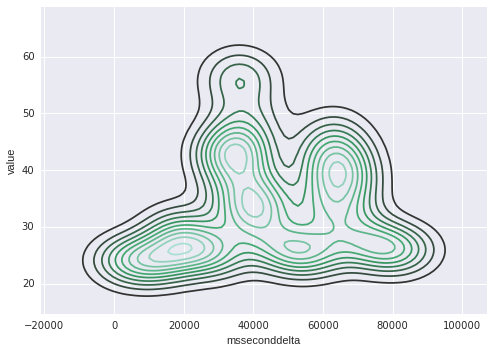

In [27]:
##### number of clusters (method 2) without grp.msseconddelta < 600
## append clusterNr to dataframe

for cluster in set(clusters):
    for point in data[clusters==cluster, 0]:
        #print point , "c:", cluster
        dframes4.loc[dframes4.msseconddelta == point, 'hcluster'] = cluster
        
grp2 = dframes4.groupby('hcluster').sum()
for g, ce in zip(grp2.index, grp2.index.values):
    print 'hcluster:', g, 'seconds:', grp2['msseconddeltadiff'][ce], 'minutes: ', grp2['msseconddeltadiff'][ce]/60, "s:", dframes4[dframes4.hcluster==g].datetime.min().time(), "e:", dframes4[dframes4.hcluster==g].datetime.max().time()
    
cookevents2 = grp2[grp2.msseconddeltadiff > 600].index.values
print "cookevents2", cookevents2
print "##########"
for ce in cookevents2:
    mean = (dframes4[dframes4.hcluster==ce].msseconddelta.min() + dframes4[dframes4.hcluster==ce].msseconddelta.max())/2
    print "cluster:",ce, "Start: ", dframes4[dframes4.hcluster==ce].datetime.min().time() , "mean:", time.strftime('%H:%M:%S', time.gmtime(mean)), "End: ", dframes4[dframes4.hcluster==ce].datetime.max().time()
print "##########"
cluster_number2 = len(cookevents2)
print cluster_number2

mergeddf2 = pd.DataFrame()
for cg in cookevents2:
    mergeddf2 = pd.concat([mergeddf2,pd.DataFrame(dframes4[dframes4['hcluster']==cg])], axis=0)
    
CT = mergeddf2[['msseconddelta', 'valuebit']].values

# plot some shit
fig = plt.figure()
ax = dframes4.plot(x='datetime', y='value', style='o')
text = str(dframes4.datetime.min().date()) + "\n"
for ce in cookevents2:
    mean = (dframes4[dframes4.hcluster==ce].msseconddelta.min() + dframes4[dframes4.hcluster==ce].msseconddelta.max())/2
    text += "cluster:" + str(ce) + ",start: " + str(dframes4[dframes4.hcluster==ce].datetime.min().time()) + ",mean:" + str(time.strftime('%H:%M:%S', time.gmtime(mean))) + ",end: " + str(dframes4[dframes4.hcluster==ce].datetime.max().time()) + "\n"
    #ax.axvline(mean, color='k', linestyle='--')
    ax.axvspan(dframes4[dframes4.hcluster==ce].datetime.min(), dframes4[dframes4.hcluster==ce].datetime.max(), facecolor='g', alpha=0.5)
#ax.axvspan(dframes4.datetime.values[30], dframes4.datetime.values[50], facecolor='g', alpha=0.5)
dframes4.plot(x='datetime', y='valuediffauto', style='.', color='r', ax=ax, title=text)
fig.set_title="blaaaaaaaaaaaa"
fig.suptitle('test title', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Temperature', fontsize=16)
#plt.axvline(50)
plt.show(fig)

import seaborn as sns
#sns.lmplot('msseconddelta', 'value', data=dframes4, fit_reg=False)
#sns.kdeplot(dframes4.value)
sns.kdeplot(dframes4.msseconddelta, dframes4.value)
#sns.distplot(dframes4.value)
#sns.boxplot([dframes4.value, dframes4.msseconddelta])
sns.clustermap(dframes4.msseconddelta, dframes4.value)

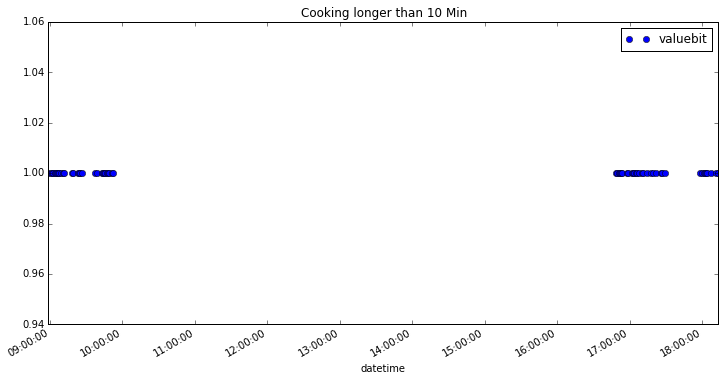

In [69]:
mergeddf2.plot(x='datetime', y='valuebit', style='o', title='Cooking longer than 10 Min')

In [70]:
## number of clusters2 ## (method1)
'''
cluster_number2 = len(set(clusters))
cluster_number2
'''

'\ncluster_number2 = len(set(clusters))\ncluster_number2\n'

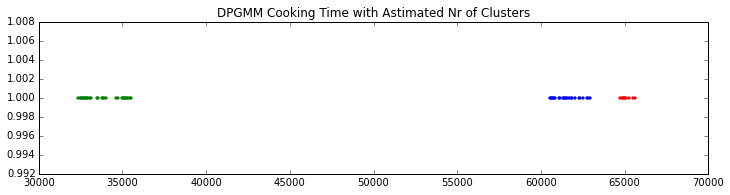

In [71]:
from sklearn import mixture
import itertools
from scipy import linalg
from itertools import cycle

color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm','y'])

dpgmm = mixture.DPGMM(n_components=cluster_number2, covariance_type='full', params='wc', n_iter=1000)
dpgmm.fit(CT)

for i, (clf, title) in enumerate([(dpgmm, 'DPGMM Cooking Time with Astimated Nr of Clusters')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(CT)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(CT[Y_ == i, 0], CT[Y_ == i, 1], 5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        #splot.add_artist(ell)

    plt.title(title)

In [75]:
## append clusterNr to dataframe
Y = dpgmm.predict(CT)

dpgmmclusterlist = []
for i, (mean, covar, weight) in enumerate(zip(dpgmm.means_, dpgmm._get_covars(), dpgmm.weights_)):
        meanx = mean[0]
        print "Cluster", i, " Elements: ",len(CT[Y==i,0]), " Mean ", mean[0],time.strftime('%H:%M:%S', time.gmtime(mean[0]))#, " Time:", hours,":",minutes,":",seconds
        dpgmmclusterlist.append(i)
        for z in enumerate(CT[Y==i,0]):
            # append cluster# to row
            dframes4.loc[dframes4.msseconddelta == z[1], 'dpgmmcluster'] = i
        
        print "Start: ", dframes4[dframes4.dpgmmcluster==i].datetime.min().time()    
        print "End: ", dframes4[dframes4.dpgmmcluster==i].datetime.max().time()
dframes4[dframes4.dpgmmcluster==2]

Cluster 0  Elements:  9  Mean  65077.775 18:04:37
Start:  17:58:16
End:  18:13:19
Cluster 1  Elements:  29  Mean  33860.2784138 09:24:20
Start:  08:58:57
End:  09:52:11
Cluster 2  Elements:  23  Mean  61594.2007826 17:06:34
Start:  11:18:33
End:  17:29:09


,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,msseconddelta,valuediff,valuediffauto,valuebit,blockevent_counter,cooking_event,timediff,msseconddeltadiff,dpgmmcluster,hcluster
4704,2010-07-31 11:18:33,1280575113,421,R,0,4,3713275,143,1,31.9,...,40713.421,0.9,0.9,True,0,J,00:05:01,60.247,2,5
4706,2010-07-31 11:19:33,1280575173,668,R,0,4,3713289,143,1,32.9,...,40773.668,1.0,1.0,True,1,J,00:01:00,60.247,2,5
4719,2010-07-31 11:20:33,1280575233,915,R,0,4,3713314,143,1,57.3,...,40833.915,24.4,24.4,True,2,J,00:01:00,60.246,2,5
4773,2010-07-31 11:26:35,1280575595,391,R,0,4,3713435,143,1,34.4,...,41195.391,1.5,1.5,True,0,K,00:02:01,180.729,2,5
4789,2010-07-31 11:29:36,1280575776,120,R,0,4,3713487,143,1,35.3,...,41376.120,0.9,0.9,True,1,K,00:03:01,120.488,2,5
4806,2010-07-31 11:31:36,1280575896,608,R,0,4,3713526,143,1,36.5,...,41496.608,1.2,1.2,True,2,K,00:02:00,60.248,2,5
6422,2010-07-31 16:48:58,1280594938,332,R,0,4,3718907,143,1,26.9,...,60538.332,1.3,1.3,True,0,L,00:01:00,60.248,2,2
6425,2010-07-31 16:49:58,1280594998,580,R,0,4,3718923,143,1,28.1,...,60598.580,1.2,1.2,True,1,L,00:01:00,60.246,2,2
6433,2010-07-31 16:50:58,1280595058,826,R,0,4,3718939,143,1,29.7,...,60658.826,1.6,1.6,True,2,L,00:01:00,60.247,2,2
6437,2010-07-31 16:51:59,1280595119,73,R,0,4,3718954,143,1,31.5,...,60719.073,1.8,1.8,True,3,L,00:01:01,60.247,2,2


In [59]:
for cluster in dpgmmclusterlist:
    print "Cluster:", cluster, "s:", dframes4[dframes4.dpgmmcluster==cluster].datetime.min(), ", e:", dframes4[dframes4.dpgmmcluster==cluster].datetime.max()

Cluster: 0 s: 2010-07-31 17:58:16 , e: 2010-07-31 18:13:19
Cluster: 1 s: 2010-07-31 08:58:57 , e: 2010-07-31 09:52:11
Cluster: 2 s: 2010-07-31 11:18:33 , e: 2010-07-31 17:29:09


In [29]:
dframes4[(dframes4.dpgmmcluster >= 0)]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,seconddelta,msseconddelta,valuediff,valuediffauto,valuebit,blockevent_counter,cooking_event,timediff,msseconddeltadiff,dpgmmcluster
2086,2010-05-23 09:51:00,1274608260,597,R,0,4,786989,173,1,23.1,...,35460,35460.597,0.3,0.3,True,0,A,00:11:05,665.137,0
2110,2010-05-23 09:56:01,1274608561,812,R,0,4,787079,173,1,23.9,...,35761,35761.812,0.8,0.8,True,1,A,00:05:01,301.215,0
2122,2010-05-23 09:58:02,1274608682,301,R,0,4,787118,173,1,24.5,...,35882,35882.301,0.6,0.6,True,2,A,00:02:01,120.489,0
2155,2010-05-23 10:01:03,1274608863,30,R,0,4,787183,173,1,25.4,...,36063,36063.030,0.9,0.9,True,3,A,00:03:01,180.729,0
2174,2010-05-23 10:03:03,1274608983,519,R,0,4,787228,173,1,26.4,...,36183,36183.519,1.0,1.0,True,4,A,00:02:00,120.489,0
2211,2010-05-23 10:05:27,1274609127,566,R,0,4,787309,173,1,27.4,...,36327,36327.566,1.0,1.0,True,5,A,00:02:24,144.047,0
2234,2010-05-23 10:07:28,1274609248,65,R,0,4,787358,173,1,28.1,...,36448,36448.065,0.7,0.7,True,6,A,00:02:01,120.499,0
2262,2010-05-23 10:10:29,1274609429,159,R,0,4,787424,173,1,29.0,...,36629,36629.159,0.9,0.9,True,7,A,00:03:01,181.094,0
2304,2010-05-23 10:13:30,1274609610,104,R,0,4,787504,173,1,29.8,...,36810,36810.104,0.8,0.8,True,8,A,00:03:01,180.945,0
2329,2010-05-23 10:18:32,1274609912,330,R,0,4,787594,173,1,30.5,...,37112,37112.330,0.7,0.7,True,9,A,00:05:02,302.226,0


In [30]:
### kmeans clustering ###

from sklearn.cluster import KMeans
km = KMeans(n_clusters=cluster_number2)
cluster_number2

2

In [31]:
km.fit(CT)
km.labels_
km.cluster_centers_[0]

array([  3.72380464e+04,   1.00000000e+00])

In [32]:
Y_ = km.predict(CT)
Y_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [33]:
## append kmeans clusters to rows
for point, cluster in zip(CT, km.predict(CT)):
    print point, cluster
    dframes4.loc[dframes4.msseconddelta == point[0], 'kmeanscluster'] = cluster

[35460.597 True] 0
[35761.812 True] 0
[35882.301 True] 0
[36063.03 True] 0
[36183.519 True] 0
[36327.566 True] 0
[36448.065 True] 0
[36629.159 True] 0
[36810.104 True] 0
[37112.33 True] 0
[37473.787 True] 0
[37654.516 True] 0
[37895.491 True] 0
[38076.221 True] 0
[38136.469 True] 0
[38196.716 True] 0
[38256.964 True] 0
[38317.211 True] 0
[38377.458 True] 0
[38437.705 True] 0
[38497.953 True] 0
[44945.963 True] 1
[45006.21 True] 1
[45066.458 True] 1
[45126.704 True] 1
[45186.951 True] 1
[45247.197 True] 1
[45481.452 True] 1


In [34]:
CT[Y_ == 0, 1]

array([True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True], dtype=object)